# Chameleon KVM@TACC Cloud Traces

Chameleon provides an installation of OpenStack Kilo using the KVM virtualization technology at the [KVM@TACC][1] site. For more information about the Chameleon KVM site, please read our [user documentation][2]. 

Chameleon Team has been developed a [trace data structure][3] based on data from OpenStack Nova. In addition, a [software tool][4] has been implemented and used to extract the appropriate data. The Chameleon [KVM@TACC][1] cloud traces are then published on [Science Clouds][4].

In this Jupyter Notebook, we show simple examples of how to download Chameleon KVM cloud traces and analyze the data. 

[1]: https://openstack.tacc.chameleoncloud.org
[2]: https://chameleoncloud.readthedocs.io/en/latest/technical/kvm.html
[3]:https://scienceclouds.org/cloud-traces/cloud-trace-format/
[4]: https://github.com/ChameleonCloud/starcompactor
[5]: http://press3.mcs.anl.gov/scienceclouds/cloud-traces/

## Download Cloud Traces

Download Chameleon KVM@TACC cloud traces from [Science Clouds][1]. 

[1]: http://press3.mcs.anl.gov/scienceclouds/

In [1]:
import datetime
import pandas as pd 

from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

resp = urlopen("http://scienceclouds.org/files/2018/11/Chameleon_KVM_cloud_trace.zip")
zipfile = ZipFile(BytesIO(resp.read()))
# zip contains one file
kvm_cloud_traces_df = pd.read_csv(zipfile.open(zipfile.namelist()[0]), parse_dates=['START_TIME', 'FINISH_TIME']) 
print("Downloading and reading cloud traces completed successfully!")
kvm_cloud_traces_df.head(10)

,INSTANCE_UUID,EVENT,START_TIME,START_SEC,FINISH_TIME,FINISH_SEC,EVENT_DURATION,RESULT,MEMORY_MB,DISK_GB,VCPUS,INSTANCE_NAME,USER_ID,PROJECT_ID,HOST_NAME (PHYSICAL)
0,446b1eae-09f2-488d-8736-5685c7cf13d0,compute__do_build_and_run_instance,2015-09-06 23:31:16,0.0,2015-09-06 23:32:03,47.0,47.0,Success,2048,20,1,8e308920ab9ab026a367a5cb5f005072,e1917a5ef74aa88ee502f18e480b00c1,e1917a5ef74aa88ee502f18e480b00c1,25aaeac963ca1ed9b317a3979d1642b8
1,446b1eae-09f2-488d-8736-5685c7cf13d0,compute_terminate_instance,2015-09-07 14:25:25,53649.0,2015-09-07 14:25:26,53650.0,1.0,Success,2048,20,1,8e308920ab9ab026a367a5cb5f005072,e1917a5ef74aa88ee502f18e480b00c1,e1917a5ef74aa88ee502f18e480b00c1,25aaeac963ca1ed9b317a3979d1642b8
2,98d32f8a-5e75-4d5d-a5ac-77e6e504a158,compute__do_build_and_run_instance,2015-09-07 14:25:32,53656.0,2015-09-07 14:30:38,53962.0,306.0,Success,2048,20,1,8e308920ab9ab026a367a5cb5f005072,e1917a5ef74aa88ee502f18e480b00c1,e1917a5ef74aa88ee502f18e480b00c1,25aaeac963ca1ed9b317a3979d1642b8
3,98d32f8a-5e75-4d5d-a5ac-77e6e504a158,compute_terminate_instance,2015-09-07 14:33:20,54124.0,2015-09-07 14:33:21,54125.0,1.0,Success,2048,20,1,8e308920ab9ab026a367a5cb5f005072,e1917a5ef74aa88ee502f18e480b00c1,e1917a5ef74aa88ee502f18e480b00c1,25aaeac963ca1ed9b317a3979d1642b8
4,ebc06913-d5ab-4787-864e-aa0e437bb478,compute__do_build_and_run_instance,2015-09-07 14:33:50,54154.0,2015-09-07 14:38:57,54461.0,307.0,Success,2048,20,1,8e308920ab9ab026a367a5cb5f005072,e1917a5ef74aa88ee502f18e480b00c1,e1917a5ef74aa88ee502f18e480b00c1,25aaeac963ca1ed9b317a3979d1642b8
5,ebc06913-d5ab-4787-864e-aa0e437bb478,compute_terminate_instance,2015-09-07 15:14:39,56603.0,2015-09-07 15:14:39,56603.0,0.0,Success,2048,20,1,8e308920ab9ab026a367a5cb5f005072,e1917a5ef74aa88ee502f18e480b00c1,e1917a5ef74aa88ee502f18e480b00c1,25aaeac963ca1ed9b317a3979d1642b8
6,8c0ac3f2-ed4b-46ae-9e78-6e8f33ee3605,compute__do_build_and_run_instance,2015-09-07 15:18:46,56850.0,2015-09-07 15:23:53,57157.0,307.0,Success,2048,20,1,8e308920ab9ab026a367a5cb5f005072,e1917a5ef74aa88ee502f18e480b00c1,e1917a5ef74aa88ee502f18e480b00c1,25aaeac963ca1ed9b317a3979d1642b8
7,8c0ac3f2-ed4b-46ae-9e78-6e8f33ee3605,compute_terminate_instance,2015-09-08 13:14:27,135791.0,2015-09-08 13:14:28,135792.0,1.0,Success,2048,20,1,8e308920ab9ab026a367a5cb5f005072,e1917a5ef74aa88ee502f18e480b00c1,e1917a5ef74aa88ee502f18e480b00c1,25aaeac963ca1ed9b317a3979d1642b8
8,4a46552e-04e2-4903-a2d3-31aa7fc8dfe0,compute__do_build_and_run_instance,2015-09-08 13:14:44,135808.0,2015-09-08 13:19:50,136114.0,306.0,Success,2048,20,1,8e308920ab9ab026a367a5cb5f005072,e1917a5ef74aa88ee502f18e480b00c1,e1917a5ef74aa88ee502f18e480b00c1,25aaeac963ca1ed9b317a3979d1642b8
9,4a46552e-04e2-4903-a2d3-31aa7fc8dfe0,compute_terminate_instance,2015-09-08 13:41:30,137414.0,2015-09-08 13:41:31,137415.0,1.0,Success,2048,20,1,8e308920ab9ab026a367a5cb5f005072,e1917a5ef74aa88ee502f18e480b00c1,e1917a5ef74aa88ee502f18e480b00c1,25aaeac963ca1ed9b317a3979d1642b8


## Favorite flavors

In OpenStack, flavors define the compute, memory, and storage capacity of nova computing instances. To put it simply, a flavor is an available hardware configuration for a server. It defines the size of a virtual server that can be launched. [\[1\]][1].

[1]: https://docs.openstack.org/horizon/latest/admin/manage-flavors.html

### Instance flavors available at Chameleon KVM@TACC

In [2]:
flavors = [
    {
        'FLAVOR': 'm1.tiny',
        'VCPUS': 1,
        'DISK_GB': 1,
        'MEMORY_MB': 512
    },
    {
        'FLAVOR': 'm1.small',
        'VCPUS': 1,
        'DISK_GB': 20,
        'MEMORY_MB': 2048
    },
    {
        'FLAVOR': 'm1.medium',
        'VCPUS': 2,
        'DISK_GB': 40,
        'MEMORY_MB': 4096
    },
    {
        'FLAVOR': 'storage.medium',
        'VCPUS': 1,
        'DISK_GB': 2048,
        'MEMORY_MB': 4096
    },
    {
        'FLAVOR': 'm1.large',
        'VCPUS': 4,
        'DISK_GB': 80,
        'MEMORY_MB': 8192
    },
    {
        'FLAVOR': 'm1.xlarge',
        'VCPUS': 8,
        'DISK_GB': 160,
        'MEMORY_MB': 16384
    },
    {
        'FLAVOR': 'm1.xxlarge',
        'VCPUS': 8,
        'DISK_GB': 160,
        'MEMORY_MB': 32768
    },
    {
        'FLAVOR': 'm1.xxxlarge',
        'VCPUS': 16,
        'DISK_GB': 160,
        'MEMORY_MB': 32768
    }
]
flavors_df = pd.DataFrame(flavors)[['FLAVOR', 'VCPUS', 'MEMORY_MB', 'DISK_GB']]
flavors_df

,FLAVOR,VCPUS,MEMORY_MB,DISK_GB
0,m1.tiny,1,512,1
1,m1.small,1,2048,20
2,m1.medium,2,4096,40
3,storage.medium,1,4096,2048
4,m1.large,4,8192,80
5,m1.xlarge,8,16384,160
6,m1.xxlarge,8,32768,160
7,m1.xxxlarge,16,32768,160


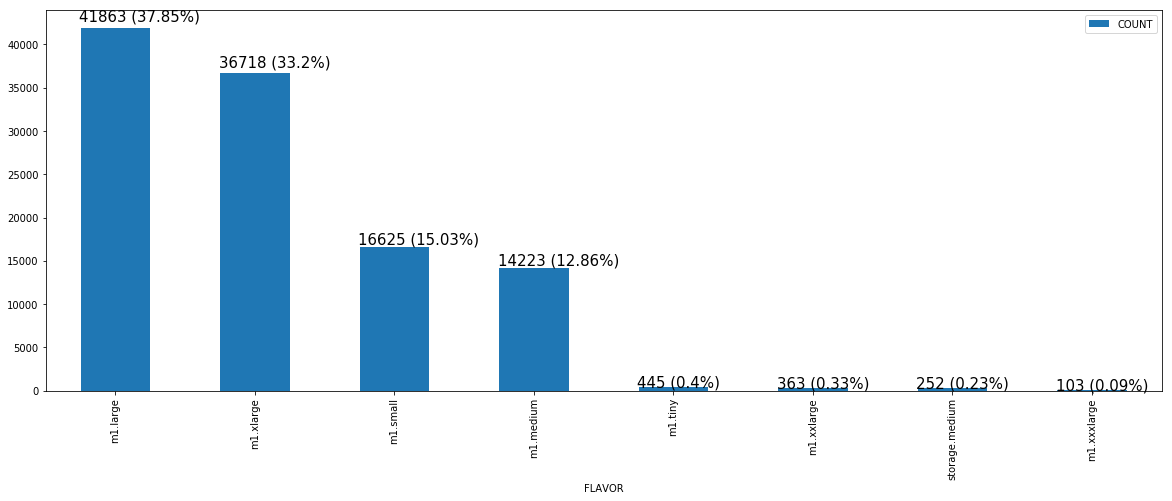

In [4]:
import matplotlib.pyplot as plt

# function for plotting KVM type
def plot_bar_percent(df, figsize, fontsize):
    ax = df.plot(kind='bar', figsize=figsize)
    
    # create a list to collect the plt.patches data
    totals = []
    # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_height())

    # set individual bar lables using above list
    total = sum(totals)
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()-.01, i.get_height()*1.02, str(i.get_height()) + ' (' + str(round((i.get_height()/total)*100, 2))+'%)', fontsize=fontsize)
    

kvm_cloud_traces_flavor_df = pd.merge(kvm_cloud_traces_df, flavors_df,  how='left', left_on=['VCPUS','MEMORY_MB','DISK_GB'], right_on = ['VCPUS','MEMORY_MB','DISK_GB'])

instance_type_df = kvm_cloud_traces_flavor_df.groupby('INSTANCE_UUID').first().reset_index()

plot_bar_percent(instance_type_df[['INSTANCE_UUID', 'FLAVOR']].groupby('FLAVOR').size().to_frame('COUNT').sort_values(by=['COUNT'], ascending=False), (20,7), 15)
plt.show()